In [1]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Load data
from tensorflow import keras
cifar = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()
X = x_train[:5000,:,:,0]
y = np.reshape(y_train[:5000],(5000))
print(np.shape(X))
#digits = load_digits()
#X = np.reshape(digits.data, (len(digits.data),8,8))
#y = digits.target


(5000, 32, 32)


In [15]:
from skimage.measure import block_reduce
pooled_X = []
for x in X:
    pooled_X.append(block_reduce(x,(2,2),np.max))

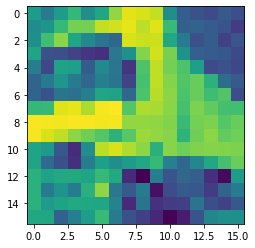

In [16]:
plt.imshow(pooled_X[1])

Shape of feature data:  (5000, 200)
Time to compute features:  0:00:07.391684
kNN Results:  [0.16436713 0.16856629 0.16926771]
Gradient Boosting Results:  [0.21895621 0.22075585 0.21128451]


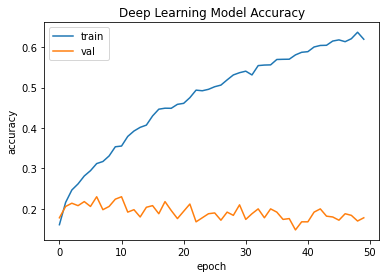

In [20]:
# Baseline : Not Using any filters
topfiltlearn(pooled_X,y,[])

Shape of feature data:  (5000, 1000)
Time to compute features:  0:00:48.829908
kNN Results:  [0.16436713 0.16856629 0.16926771]
Gradient Boosting Results:  [0.22015597 0.22675465 0.20468187]


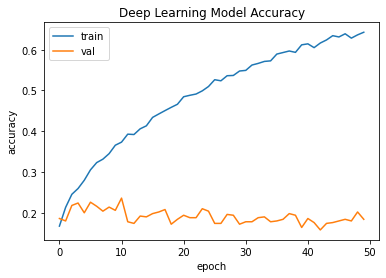

In [21]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
topfiltlearn(pooled_X,y,filters)


Shape of feature data:  (5000, 3400)
Time to compute features:  0:02:07.805445
kNN Results:  [0.20035993 0.19976005 0.21788715]
Gradient Boosting Results:  [0.24355129 0.23875225 0.23529412]


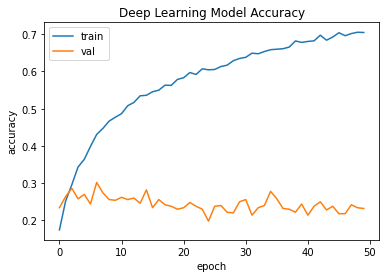

In [22]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in pooled_X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(len(patches),16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
M = np.asarray(pca.components_[:10]).T
filters = []
for i in range(16):
    weights = np.random.uniform(size=10)
    weights = weights/sum(weights)
    filters.append(np.reshape(np.matmul(M,weights),(4,4)))

topfiltlearn(pooled_X,y,filters)

Shape of feature data:  (5000, 3400)
Time to compute features:  0:02:36.112197
kNN Results:  [0.21595681 0.22855429 0.21188475]
Gradient Boosting Results:  [0.25194961 0.24835033 0.24789916]


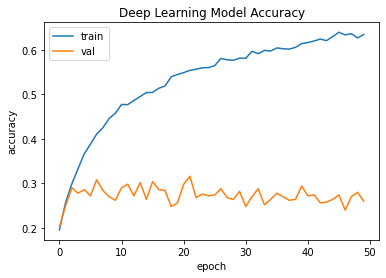

In [23]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

topfiltlearn(pooled_X,y,filters)


Shape of feature data:  (5000, 10200)
Time to compute features:  0:07:50.787478
kNN Results:  [0.23815237 0.24595081 0.22989196]
Gradient Boosting Results:  [0.25134973 0.28554289 0.26710684]


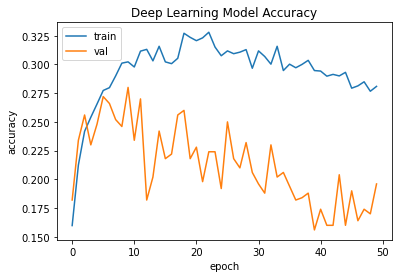

In [24]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,25),(5,5)))

topfiltlearn(pooled_X,y,filters)
